In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# check_status

In [ ]:
print("--- check tensorflow feasibility ---")
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))
sess.close()
 
print("--- check tensorflow version ---")
print(tf.__version__)
 
print("--- check numpy version ---")
print(np.__version__)

data_check = np.array([
    [0,0],
    [1,1],
    [2,2],
    [3,3],
    [4,4],
    [5,5]
])

xy = data_check.T
x_data = xy[0]
y_data = xy[1]
plt.plot(x_data, y_data)
plt.xlabel("x value")
plt.ylabel("y value")
plt.show()

## -------------------------------- Hello world!!  --------------------------------
### tf.constant(), tf.Session(), sess.run(), sess.close()

TensorFlow 로 프로그래밍 하는 것의 기본은 다음과 같습니다.

1. 그래프를 만든다.

2. 그래프를 실행한다

TensorFlow에서 그래프는 노드(덧셈, 뺄셈 등의 연산, 변수 등)와 엣지(Tensor의 흐름, 즉 실제 값이 전달되는 것)로 구성되어 있습니다. 

그래프를 만드는 것은 매개변수와 연산을 정의하는 과정이고 그래프를 실행하는 것은 정의된 매개변수와 연산을 실행하는 과정입니다.

TensorFlow가 C/C++이나 Java 등의 다른 프로그래밍 언어와 다른 점은 

(그래프의 개념이 아니더라도) 덧셈, 뺄셈과 같은 어떤 연산을 수행할 때, 

반드시 Session 객체를 만들고 Session에 있는 run() 메소드를 사용해야 한다는 것입니다.

아래 예제 코드에서 "Hello World"가 바로 출력되지 않는 것이 이런 이유입니다.

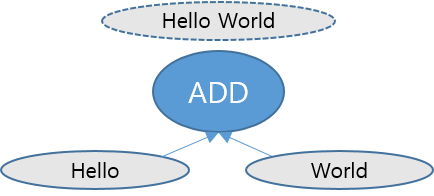

In [ ]:
#그래프 정의
h = tf.constant("Hello")
w = tf.constant(" World!!")
hw = tf.add(h, w)

print(h)
print(w)
print(hw)

# 그래프 실행
with tf.Session() as sess : 
    # 코드
    ans = sess.run(hw)
    print(ans)

##  -------------------------------- basic_arithmetic_operation  --------------------------------
### tf.add(), tf.subtract(), tf.multiply(), tf.divide() ...
TensorFlow에서 제공하는 사칙연산 api 입니다. 직관적으로 어떤 연산을 하는지 알 수 있습니다.

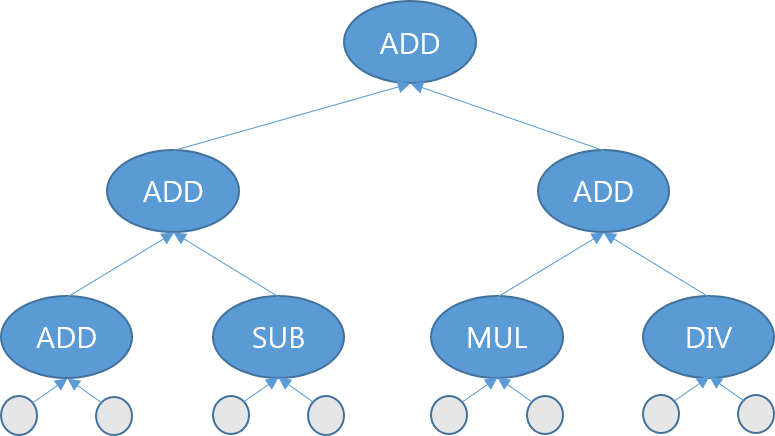

In [ ]:
my_graph = tf.Graph()

print(tf.get_default_graph())
print(my_graph)

with my_graph.as_default() : 
    # 10 20 30 40
    a = tf.constant(10.0, name='a_val')
    b = tf.constant(20.0, name='b_val')
    c = tf.constant(30.0, name='c_val')
    d = tf.constant(40.0, name='d_val')
    
    with tf.name_scope("level1") :
        my_add = tf.add(a, b, name='my_add')
        my_sub = tf.subtract(c, b, name='my_sub')
        my_mul = tf.multiply(a, d, name='my_multiply')
        my_div = tf.divide(c, a, name='my_div')

    with tf.name_scope("level2") :
        final_add1 = tf.add(my_add, my_sub, name='final_add1')
        final_add2 = tf.add(my_mul, my_div, name='final_add2')
        
    with tf.name_scope("level3") :
        final_result = tf.add(final_add1, final_add2, name='final_result')

    with tf.Session(graph=my_graph) as sess :

        log_dir = '.\my_graph'

        print(sess.run(my_add))
        print(sess.run(my_sub))
        print(sess.run(my_mul))
        print(sess.run(my_div))
        print(sess.run(final_result))

        writer = tf.summary.FileWriter(log_dir, graph=my_graph)
        writer.close()

##  -------------------------------- Matrix  --------------------------------
### tf.matmul(), tf.get_shape()


머신러닝에서는 머신에게 알려주는 데이터(입력/정답)가 학습 시간이나 결과에 큰 영향을 끼칩니다.

예를 들어, 잘못된 값이나 형태의 데이터를 알려주면 정답에 가까운 학습 결과를 낼 수 없거나 학습 시간이 굉장이 길어집니다.

학습 시간이 길어진다는 것은 그만큼 머신러닝을 하는 기기(서버나 디바이스)에 큰 부하를 줄 것입니다.

따라서 머신에게 알려주는 데이터의 형태를 이해하는 것은 중요합니다.

실제  머신러닝에서의 대부분의 입력 데이터 형태는 행렬입니다. 

TensorFlow에서의 tensor는 tensor는 N-dimensional array. 즉, N차원 배열, 즉 행렬입니다. 

행렬은 차원에 따라서 다음과 같이 정의 합니다.

관련한 자세한 내용은 https://www.tensorflow.org/programmers_guide/tensors 참고하세요.

    rank 0, scalar, 12
    rank 1, vector, v = [1.1, 2.2, 3.3] 1차원 행렬
    rank 2, matrix, m = [[1,2,3], [4,5,6], [7,8,9]] 2차원 행렬
    rank 3, 3-Tensor(cube), t = [[[2],[4],[6]], [[8],[10],[12]],[[14],[16],[18]]]
    rank n, n-Tensor(you get the idea, ....


행렬 (M x K) 와 행렬 (K x N)에 대해서, 덧셈 뺄셈은 두 행렬의 차원이 같을 때 가능합니다. 

예를 들어, (2 X 2) + (2 X 2) 가 가능한 것이죠.

다만, 행렬의 곱셈은 (M x K)와 (K x N)에서 K가 서로 같을 때 가능하며, 곱셈의 결과는 (M x N) 행렬이 나오게 됩니다.

TensorFlow에서 행렬의 shape (각 차원의 요소 수)는 변수명.get_shape() 으로 확인할 수 있고,

행렬의 곱셈은 tf.matmul()을 통해 가능합니다.

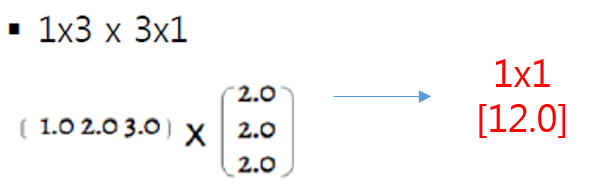

In [ ]:
mg1 = tf.Graph()
with mg1.as_default() : 
    # Numpy
    x_data = np.array([[1.0, 2.0, 3.0]]) # (1, 3)
    w_data = np.array([[2.0], [2.0], [2.0]]) # (3, 1)
    print(x_data.shape)
    print(w_data.shape)

    # Tensor
    x = tf.constant( [[1.0, 2.0, 3.0]] ) # 1x3
    w = tf.constant( [[2.0], [2.0], [2.0]] )
    y = tf.matmul(x, w)

    print(x.get_shape())
    print(w.get_shape())
    print(y)
    
    with tf.Session(graph=mg1) as sess :
        result = sess.run(y)
        print("result = {}".format(result))

## -------------------------------- Variables --------------------------------
### tf.Variable(), tf.global_variables_initializer()

머신러닝에서 학습의 목적은 정답을 유추하기 위한 최소의 cost와 최적의 weight를 찾는 것입니다.

따라서 학습하는 과정 (그래프를 실행하는 단계) 에서 그 값에 학습 step 별로 업데이트가 이루어져야만 합니다. 

즉 그래프가 실행되는 과정(즉, sess.run() 내부에서의 처리) 에서 값의 업데이트가 필요한 것인데 

기존에 배웠던 tf.constant는 그래프가 실행되는 과정에서 값의 업데이트가 불가능합니다. 

이를 위해 TensorFlow에서는 Variable class를 제공하고 tf.Variable로 사용할 수 있습니다.

In [ ]:
mg2 = tf.Graph() 

print(mg2)
print(tf.get_default_graph())

with mg2.as_default() :
    xv = tf.Variable([[1.0, 2.0, 3.0]], tf.float32)
    wv = tf.Variable( [[2.0], [2.0], [2.0]] , tf.float32)
    yv = tf.matmul(xv, wv)

    with tf.Session() as sess : 
        
        print(sess.graph)
        
        init = tf.global_variables_initializer()
        sess.run(init)
        result = sess.run(yv)
        print("result : ", result)

# x = tf.constant( [[1.0, 2.0, 3.0]] ) # 1x3
# w = tf.constant( [[2.0], [2.0], [2.0]] )
# y = tf.matmul(x, w)

## -------------------------------- placeholder --------------------------------
### tf.placeholder(), feed_dict

TensorFlow에서 데이터를 feeding 하는 방법을 제공합니다.

즉, 그래프가 실행되는 시점에 원하는 전처리된 데이터를 넣는 것인데요. 

tf.placeholder()로 feed할 빈 변수를 선언할 수 있고, sess.run()이나 eval()과 같은 메소드가 실행될 때, 

placeholder로 선언한 변수에 feed_dict attribute를 사용하여 데이터를 실제로 그래프에 전달할 수 있습니다.

In [ ]:
mg3 = tf.Graph()

with mg3.as_default() :
    x_data = [[1.0, 2.0, 3.0]]
    w_data = [[2.0], [2.0], [2.0]]
    
    # [[1.0, 2.0, 3.0],[1.0, 2.0, 3.0], [1.0, 2.0, 3.0], [1.0, 2.0, 3.0]] (1, 3)
    xp = tf.placeholder(tf.float32, shape=(None, 3))
    # [[2.0], [2.0], [2.0]] (3, 1)
    wp = tf.placeholder(tf.float32, shape=(None, 1))
    yp = tf.matmul(xp, wp)

    with tf.Session() as sess : 
        result = sess.run(yp, feed_dict={xp : x_data,  wp : w_data})
        print(result)
        
        log_dir = ".\my_graph"
        writer = tf.summary.FileWriter(log_dir, graph=mg3)
        writer.close()

##  -------------------------------- Save and restore graph --------------------------------

TensorFlow를 통해 학습되는 과정에서 사용되는 하이퍼파라미터(learning rate 등)나 그래프 형태 등을 저장할 수 있습니다.

기본적으로 checkpoint라는 형태로 저장됩니다. checkpoint는 아래의 4개의 파일로 구성됩니다.


## checkpoint
- checkpoint (text format) # some information on the name of the files in the checkpoint
- my-model.data-0000-of-0001 (binary format) # the saved weights 
- my-model.index (binary format)  #  probably definition of data layout in the previous file
- my-mode.meta (binary format)  #  protobuf of the graph (nodes and topology info)

이 파일 중에, .meta 확장자를 갖는 파일은 graph의 defitition을 저장합니다. 

이를 메타그래프라 부르며, graph의 operation, variable 등이 저장됩니다.

### Metagraph
Tensorflow graph를 저장할 수 있습니다.
all variables, operations, collections 등을 저장합니다. (.meta 확장자)


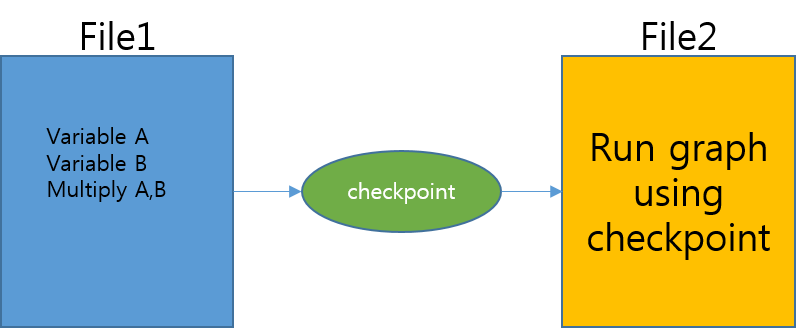

In [ ]:
a_val = tf.Variable(2.0)
b_val = tf.Variable(3.0)
c_val = tf.multiply(a_val, b_val)

saver = tf.train.Saver()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

save_dir = ".\my_checkpoint\my-model.ckpt"
saver.save(sess, save_dir)
sess.close()

In [ ]:
# Another file
with tf.Session() as sess : 
    
    new_saver = tf.train.import_meta_graph('.\my_checkpoint\my-model.ckpt.meta')
    new_saver.restore(sess, '.\my_checkpoint\my-model.ckpt')
    
    print("a = " , sess.run(a_val))
    print("b = ", sess.run(b_val))
    print("c = {}".format(sess.run(c_val)))

## -------------------------------- pb -------------------------------- 

그래프를 pb 형태로 만들 수 있습니다. pb란 protocol buffer의 약자입니다.

이식성, 확장성을 위해 Google에서 만든 것으로써, 데이터의 직렬화(Serialization) 목적입니다.

pb를 만들 때에는, tensorflow에 graph.proto 파일에 정의된 규칙 기반으로 만들어집니다.

pb를 통해 Android, ios 등에 학습한 결과를 포팅하여 사용할 수 있습니다.

(참고로 TensorFlowLite를 Flatbuffer를 사용하며, tflite 형태의 포맷을 사용합니다.)


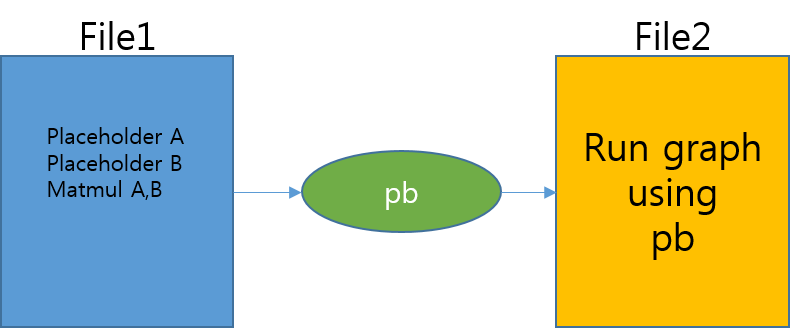

In [ ]:
# 그래프 만들기 (.pb)
cg2 = tf.Graph()
print(cg2)
with cg2.as_default() :
    with tf.Session() as sess :
        xp = tf.placeholder(tf.float32, shape=(None, 3), name="placeholder_xp" )
        wp = tf.placeholder(tf.float32, shape=(None, 1), name="placeholder_wp")
        yp = tf.matmul(xp, wp, name="matmul_yp")

        
        save_dir = ".\my_pb_graph"
        tf.train.write_graph(sess.graph_def, save_dir, "my-model.pb", as_text=False)
        writer = tf.summary.FileWriter(save_dir, graph=cg2)
        writer.close()
        
        print(sess.graph_def)

In [ ]:
import os

# 그래프 읽어오기 (.pb)
x_data = [[1.0, 2.0, 3.0]]
w_data = [[2.0], [2.0], [2.0]]

save_dir = ".\my_pb_graph"
filename = "my-model.pb"

with tf.gfile.GFile(os.path.join(save_dir, filename), "rb") as f :
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    # print(graph_def)

cg3 = tf.Graph()
with cg3.as_default() :
    tf.import_graph_def(graph_def, name="cg2")
    
    with tf.Session(graph=cg3) as sess : 
        print("====== values from each operations ======")
        entry = cg3.get_operations()
        for op in entry :
            print(op.values())
        print("=========================================")
        # print(g3.get_operation_by_name("g3_load_from_g2/placeholder_xp"))
        
        print("====== get_operation_by_name ======")
        print(cg3.get_operation_by_name("cg2/matmul_yp"))
        print("===================================")
        
        # "<op_name>:<output_index>"
        _xp  = cg3.get_tensor_by_name("cg2/placeholder_xp:0")
        _wp = cg3.get_tensor_by_name("cg2/placeholder_wp:0")
        _yp = cg3.get_tensor_by_name("cg2/matmul_yp:0")
        
        result = sess.run(_yp, feed_dict={_xp: x_data, _wp : w_data})
        
        print("result = {}".format(result))

In [ ]:
# pb to tensorboard
save_dir = ".\my_pb_graph"
filename = "my-model.pb"

with tf.gfile.GFile(os.path.join(save_dir, filename), "rb") as f :
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())    
    
cg4 = tf.Graph()
with cg4.as_default() :
    with tf.Session() as sess : 
        tf.import_graph_def(graph_def, name="load_graph")
        writer = tf.summary.FileWriter(save_dir)
        writer.add_graph(cg4)
        writer.close()

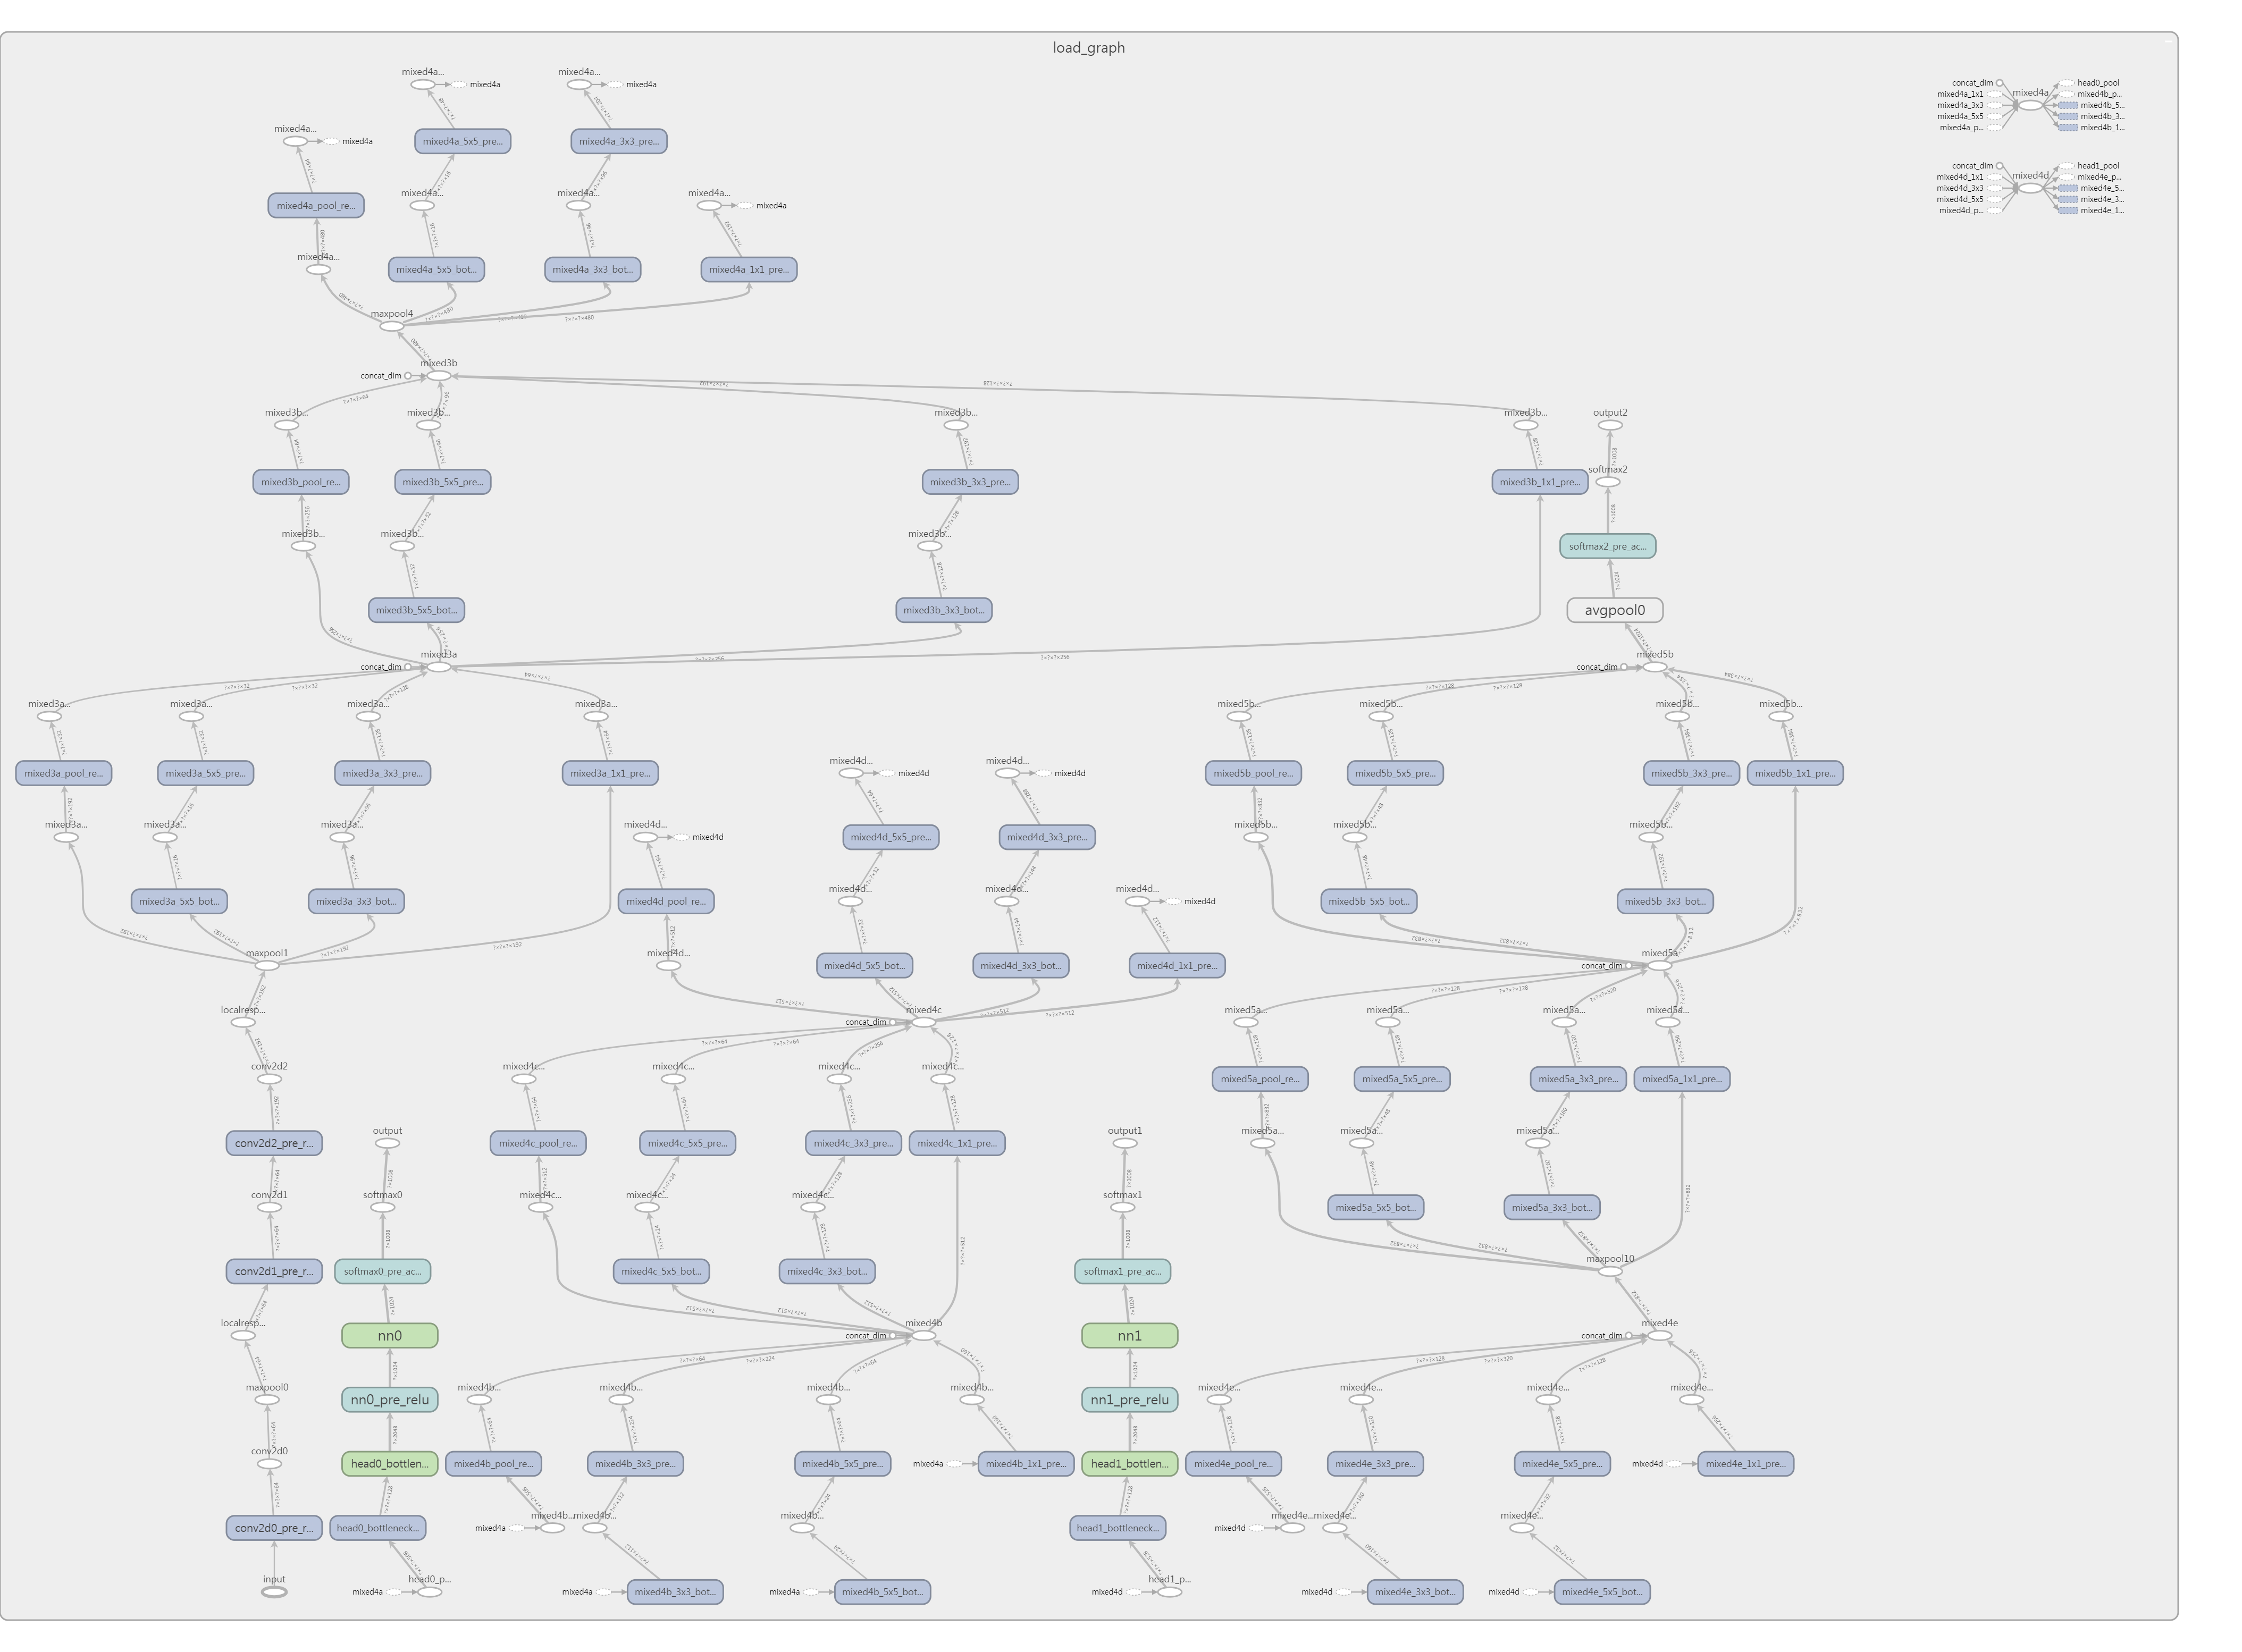

In [ ]:
# pb to tensorboard
save_dir = ".\inception"
filename = "tensorflow_inception_graph.pb"

with tf.gfile.GFile(os.path.join(save_dir, filename), "rb") as f :
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())    
    
cg4 = tf.Graph()
with cg4.as_default() :
    with tf.Session() as sess : 
        tf.import_graph_def(graph_def, name="load_graph")
        writer = tf.summary.FileWriter(save_dir)
        writer.add_graph(cg4)
        writer.close()

## -------------------------------- Linear regression --------------------------------

Linear regression 알고리즘은 좌표 상에 점들을 가장 잘 표현할 수 있는 직선의 함수를 찾아내는 알고리즘입니다.

우리는 Linear regression을 통해 좌표상의 점들에 대해서 **y=2x** 라는 직선의 함수를 찾아내려고 합니다.

머신러닝을 위한 준비 과정을 다음과 같습니다. 


1.데이터 준비 및 전처리, 가설함수 및 비용함수 정의, 비용함수 최적화 정의

> (1) 입력 데이터와 정답 데이터
>
> 입력 : 1.0, 2.0, 3.0, 4.0 (데이터는 값의 정확도를 위해서 정수보다는 실수를 사용합니다.)
>
> 정답 : 2.0, 4.0, 6.0, 8.0 
>
> (2) 가설함수 정의
>
> 우리가 찾고자 하는 가설함수 식을 알려줍니다. y=2x 즉, y=wx 라는 형태에서 w를 찾고 싶은 것임을 알려주는 것입니다. 
>
> hypothesis = W * X + b
>
> (3) 비용함수 정의
>
> Linear regression 의 비용함수는 (예측값 - 실제값)의 제곱 평균입니다. 
>
> 전체 데이터에 대한 평균 비용함수를 TensorFlow 소스 코드로 표현하면 다음과 같습니다.
>
>> cost = tf.reduce_mean(tf.square(hypothesis-Y)
>
> (4) 비용함수 최적화 정의
>
> 많이 사용하는 것은 경사하강법이라는 (gradient decent algorithm) 것입니다.
>
> 비용함수의 기울기가 작아질 수록 정답을 유추할 수 있는 가중치의 값에 가까워진다는 원리 입니다. 
>
> TensorFlow에서는 경사하강법을 위한 함수를 제공합니다.
>
> 최적화 함수를 선택 후, minimize를 통해 cost를 최적화 할 것임을 알려줍니다.
> 
>> optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
>> train_op = optimizer.minimize(cost)

2.학습
> 최적화 함수를 가리키는 매개변수(train_op)와 비용(cost)를 학습시킵니다.

3.추론(예측)
> 학습이 끝난 뒤, 가설함수에 특정 입력 데이터를 출력하여 원하는 정답이 유추되는지 확인합니다.


앞서 배운 TensorFlow 프로그래밍에서는 다음과 같이 분류할 수 있습니다.

1. 그래프 정의 : 데이터 준비 및 전처리, 가설함수 및 비용함수 정의, 비용함수 최적화 정의
2. 그래프 실행 : 학습 및 추론(예측)

[1. 2. 3. 4.]
[2. 4. 6. 8.]
0 10.280939 [2.614983] [0.499479]


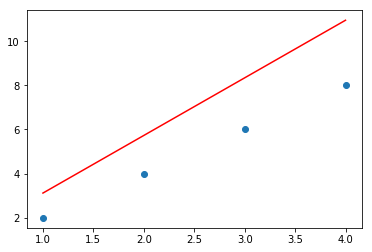

1 4.621866 [1.4427689] [0.09209165]
2 2.080698 [2.2325697] [0.35228887]


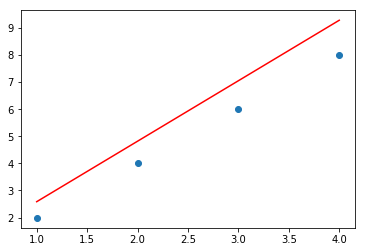

3 0.93943113 [1.7075707] [0.16554624]
4 0.42671433 [2.0634415] [0.27865162]


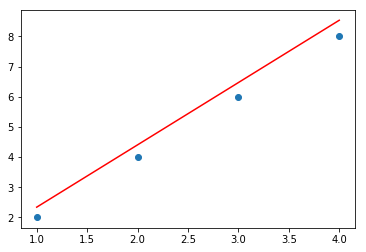

5 0.19622333 [1.8289535] [0.19120052]
6 0.09246348 [1.989923] [0.23848367]


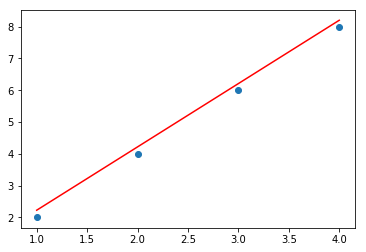

7 0.04562003 [1.8857967] [0.19582544]
8 0.024345988 [1.9591889] [0.213762]


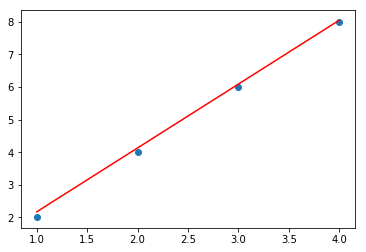

9 0.014566482 [1.9135245] [0.19141513]
10 0.009961231 [1.9475302] [0.19636984]


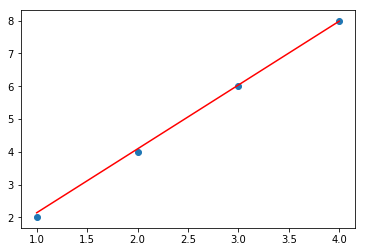

11 0.0076917647 [1.92805] [0.18333082]
12 0.006482927 [1.9443095] [0.18263961]


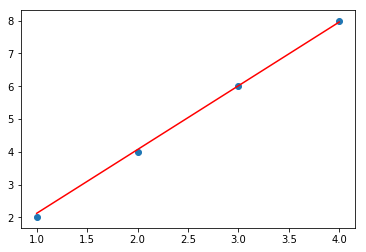

13 0.0057615084 [1.9365255] [0.17395695]
14 0.0052694716 [1.9447588] [0.17090282]


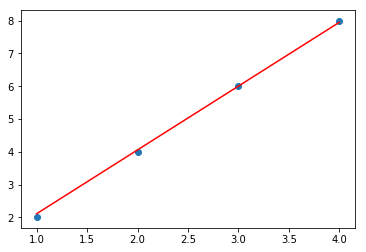

15 0.0048903236 [1.9421692] [0.16434288]
16 0.0045711924 [1.946744] [0.1603897]


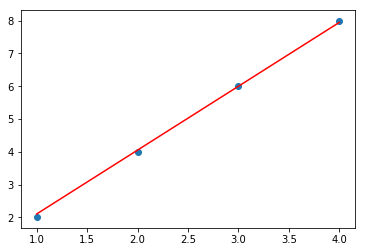

17 0.004287796 [1.9464331] [0.15493976]
18 0.004028708 [1.9493136] [0.15073529]


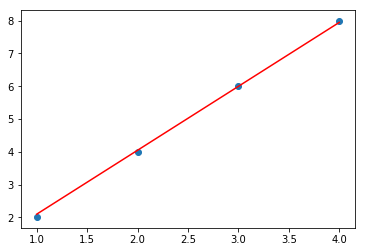

19 0.0037883192 [1.9499755] [0.1459314]

=== Training result ===
0.0037883192 [1.9499755] [0.1459314]


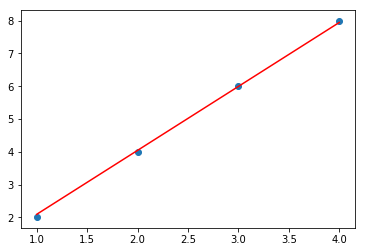


=== Infrence(Prediction) ===
X: 10 Y: [19.645687]
X: 100, Y: [195.14348]
X: 150, Y: [292.64227]


In [8]:
# Linear regression

x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6. ,8.]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)
print(x_data)
print(y_data)

lrg = tf.Graph()

with lrg.as_default() :

    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)

    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
    b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

    hypothesis = W * X + b

    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(cost)

    total_step = 20
    with tf.Session(graph=lrg) as sess :
        sess.run(tf.global_variables_initializer())

        # W, b
        for step in range(total_step) :
            _, _cost = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
            _W, _b = sess.run([W,b])
            print(step, _cost, _W, _b)

            if (step % 2 == 0) :
                plt.scatter(x_data, y_data)
                plt.plot(x_data, _W * x_data + _b, 'r')
                plt.show()

        print("\n=== Training result ===")

        print(_cost, _W, _b)
        plt.scatter(x_data, y_data)
        plt.plot(x_data, _W * x_data + _b, 'r')
        plt.show()

        print("\n=== Infrence(Prediction) ===")
        print("X: 10 Y:", sess.run(hypothesis, feed_dict={X: 10}))
        print("X: 100, Y:", sess.run(hypothesis, feed_dict={X: 100}))
        print("X: 150, Y:", sess.run(hypothesis, feed_dict={X: 150}))

### 소스 코드 설명
~~~
x_data = [1., 2., 3., 4.]
y_data = [2., 4., 6. ,8.]

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
~~~
> 입력 데이터(X)와 출력 데이터(Y)를 학습할 때 (그래프 실행될 때) feeding 할 것입니다.<br>
> 따라서, placeholder로 각각 선언하고 별도로 x_data, y_data에 대해서 값을 정의 합니다.

~~~
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

hypothesis = W * X + b
~~~
> 가중치(W)와 편향(b)는 학습하면서 계속 업데이트 될 값입니다. (정답을 유추하기 위한 가중치 값이 계속 업데이트 됨)<br>
> 학습은 그래프가 실행되면서 이루어지는데, 그래프가 실행되는 중간에 값을 변경할 수 있는 것은 Variable 이라고 했습니다.<br>
> 따라서, tf.Variable로 W와 b를 선언합니다. <br>
> 그리고 초기값은 머신은 모르는 상태이기 때문에 (우리는 2라는 것을 알지만, 여기서는 학습을 통해 2를 찾아가는 것이므로)<br>
> 균등분포를 사용하여 -1.0~1.0 사이의 랜덤한 값으로 초기화시켜줍니다.<br>
> TensorFlow에서는 tf.random_uniform()을 통해 균등분포를 갖는 값을 얻을 수 있습니다.<br>


~~~
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cost)
~~~
> 비용함수를 정의하는 부분입니다. 평균 비용함수 공식에 따라 TensorFlow에서 제공하는 API를 통해 정의합니다.<br>
> 그리고 비용함수 최적화를 위한 경사하강법을 사용하는데, TensorFlow에서는 경사하강법을 적용할 수 있는<br>
> tf.train.GradientDescentOptimizer()를 제공합니다.<br>
> 여기서 learning_rate라는 것은 비용함수를 최적화 시킬 때, 즉 비용을 경사하강법으로 값을 줄여가는 과정에서<br>
> 비용의 감소 감소하는 정도를 나타내는 것입니다.<br>
> 그리고 minimize()를 통해 명시적으로 비용함수를 최적화하겠다고 정의합니다.<br>

~~~
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for step in range(100) :
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val, sess.run(W), sess.run(b))

    print("\n=== Inference(Prediction) ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))
~~~
> W와 b를 tf.Variable로 선언하였기 때문에, tf.global_variables_initializer()를 호출하여 <br>
> 그래프 정의 시점에 선언된 tf.Variable 매개변수를를 모두 초기화 합니다.<br>
> 위의 코드에서 for loop 가 학습에 해당하는 부분입니다.<br>
> 학습 대상의 인자(argument)로는 optimizer와 cost를 넣어주고 <br>
> feed_dict로 placeholder인 X와 Y에 x_data, y_data를 feeding 시킴으로써 입력(x_data)에 대한 정답(y_data)을 알려줍니다.<br>
> 학습의 인자로 cost와 optimizer를 넣는 이유는 cost가 줄어들 수록 정답을 유추할 수 있는 가중치(weight) 값을 찾을 수 있기 때문입니다.<br>
> 총 학습의 횟수는 100회로 하였습니다. 학습의 횟수는 원하는 일반적으로 cost가 더 이상 줄어들지 않을 때까지 입니다.<br>
>
> 아래 print 문은 추론(예측)하는 부분입니다.<br>
> 추론은 우리가 머신에게 알려준 가설함수에 특정 입력 값을 넣어봄으로써<br>
> 원하는 결과가 나오는지를 확인할 수 있습니다.<br>

## -------------------------------- Neural Network --------------------------------

In [19]:
tf.set_random_seed(777)  # for reproducibility

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

print(x_data)
# print(x_data.shape)
print(type(x_data))

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)
print(x_data)
print(x_data.shape)
print(type(x_data))


nng = tf.Graph()

with nng.as_default() : 

    X = tf.placeholder(tf.float32, [None, 2])
    Y = tf.placeholder(tf.float32, [None, 1])

    W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
    b1 = tf.Variable(tf.random_normal([2]), name='bias1')
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
    b2 = tf.Variable(tf.random_normal([1]), name='bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    # cost/loss function
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(cost)

    # Accuracy computation
    # True if hypothesis>0.5 else False
    predicted = tf.cast​-(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

    # Launch graph
    with tf.Session(graph=nng) as sess:
        # Initialize TensorFlow variables
        sess.run(tf.global_variables_initializer())

        for step in range(2001):
            _, _cost = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})
            if step % 1000 == 0:
                print(step, _cost)
        
        print("\n=== Training result ===")
        print(_cost, _W, _b)

        print("\n=== Infrence(Prediction) ===")
        _W1, _b1, _W2, _b2 = sess.run([W1, b1, W2, b2])
        
        # Accuracy report
        h, c, a = sess.run([hypothesis, predicted, accuracy],
                           feed_dict={X: x_data, Y: y_data})
        print("\nHypothesis:\n", h, "\nPredicted:\n", c, "\nAccuracy:\n", a)

[[0, 0], [0, 1], [1, 0], [1, 1]]
<class 'list'>
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
(4, 2)
<class 'numpy.ndarray'>
0 0.7479292
1000 0.610293
2000 0.5376068

=== Training result ===
0.5376068 [1.9499755] [0.1459314]

=== Infrence(Prediction) ===

Hypothesis:
 [[0.11224821]
 [0.61613446]
 [0.6135707 ]
 [0.65300405]] 
Predicted:
 [[0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:
 0.75
